Applied Data Science Capstone Module 2 EDA with Visualization Lab

SpaceX Falcon 9 First Stage Landing Prediction
Assignment: Exploring and Preparing Data
Estimated time needed: 70 minutes
In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.
In this lab, you will perform Exploratory Data Analysis and Feature Engineering.
Falcon 9 first stage will land successfully
 
Several examples of an unsuccessful landing are shown here:
Objectives
Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib
•	Exploratory Data Analysis
•	Preparing Data Feature Engineering


In [4]:
! pip install scikit-learn
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn
print("done")

done


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [8]:
#URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp = await fetch(URL)
#dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
file_path = "C://Users//15129//OneDrive//Desktop//dataset_part_2.csv"
df = pd.read_csv(file_path, header=0)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

C:\Users\15129\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\15129\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


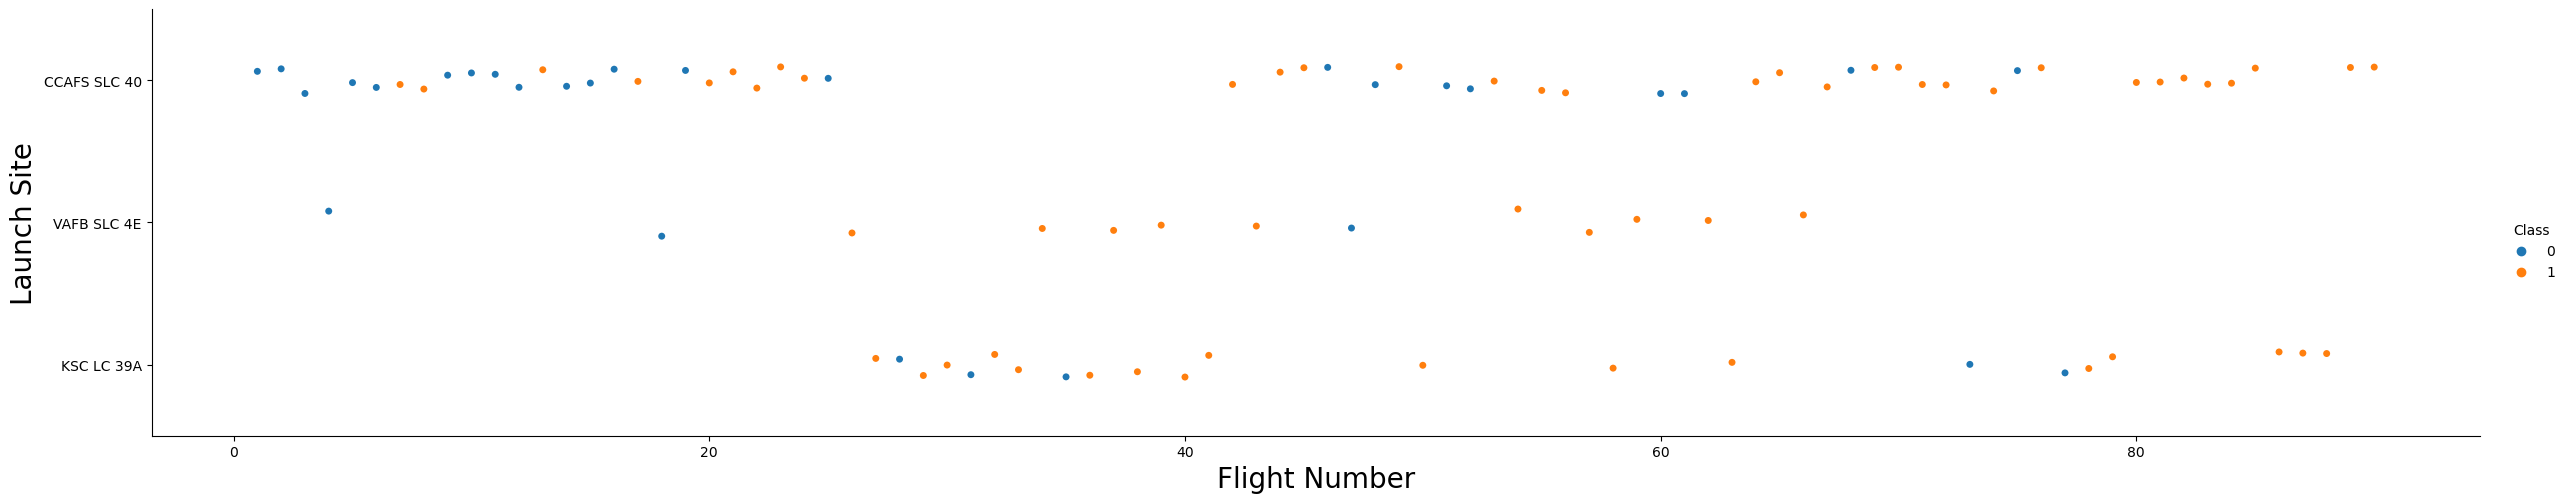

In [23]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.
TASK 2: Visualize the relationship between Payload Mass and Launch Site
We also want to observe if there is any relationship between launch sites and their payload mass.


C:\Users\15129\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\15129\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


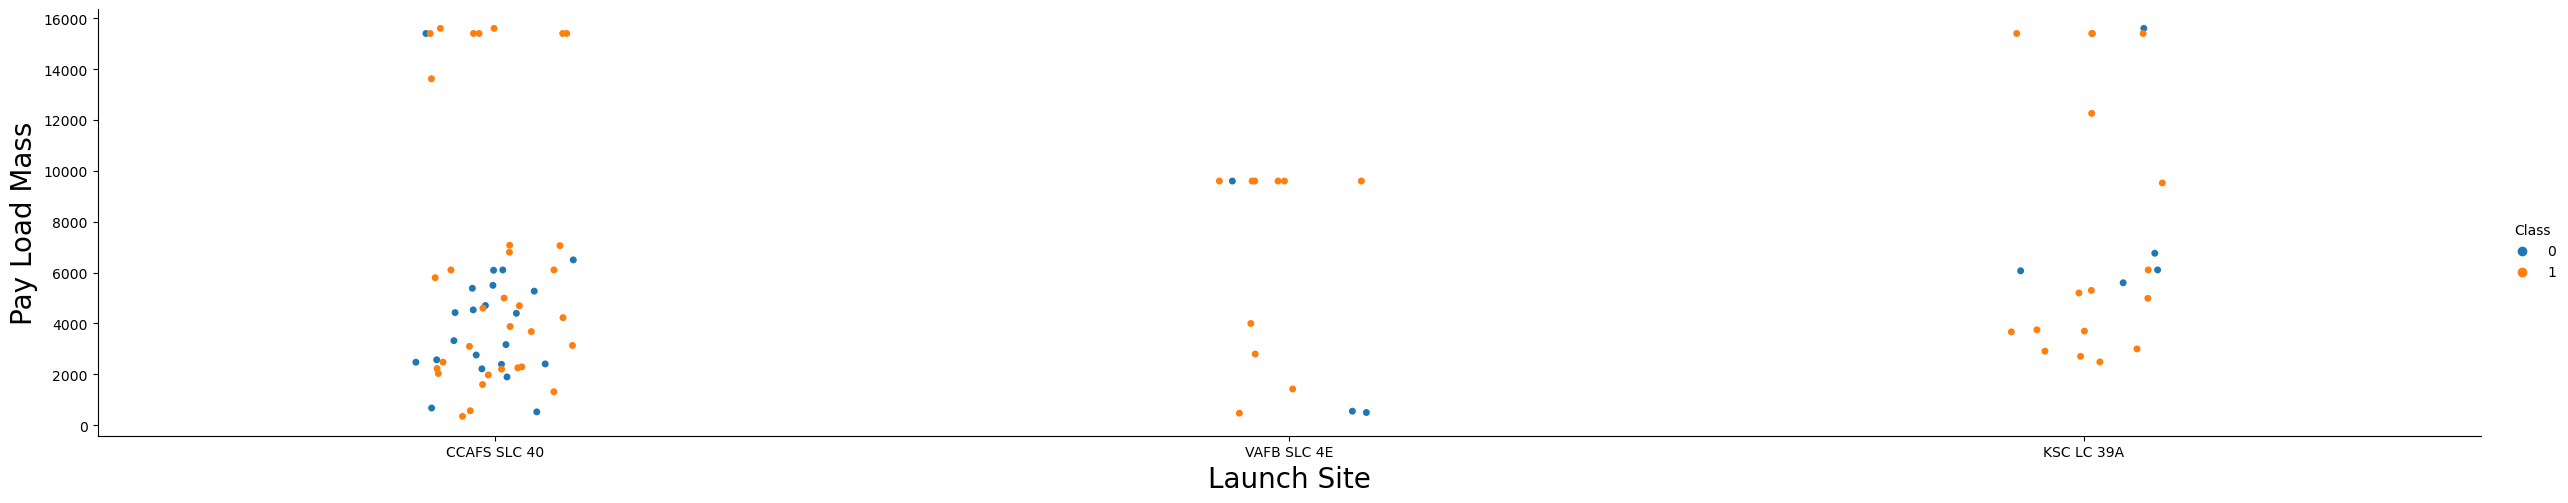

In [21]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay Load Mass",fontsize=20)
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).
TASK 3: Visualize the relationship between success rate of each orbit type
Next, we want to visually check if there are any relationship between success rate and orbit type.
Let's create a bar chart for the sucess rate of each orbit


In [15]:
# HINT use groupby method on Orbit column and get the mean of Class column
# group df by Orbits and find the mean of Class column
df_groupby_orbits = df.groupby('Orbit').Class.mean()
df_groupby_orbits

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

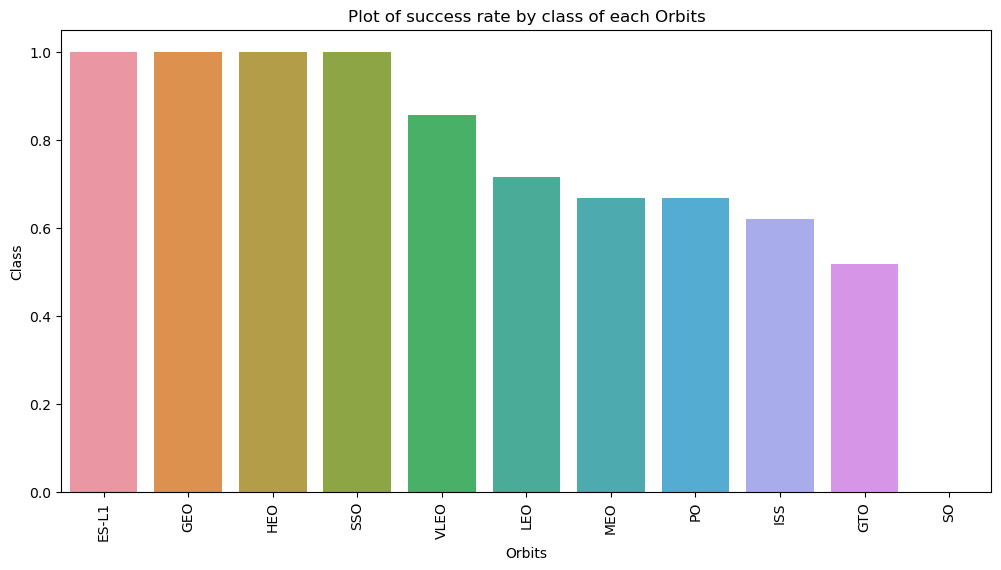

In [17]:
grouped_orbits = df.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()
fig, ax=plt.subplots(figsize=(12,6))
ax = sns.barplot(x = 'Orbit', y = 'Class', data=grouped_orbits)
ax.set_title('Plot of success rate by class of each Orbits', fontdict={'size':12})
ax.set_ylabel('Class', fontsize = 10)
ax.set_xlabel('Orbits', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90);


Analyze the plotted bar chart to identify which orbits have the highest success rates.

TASK 4: Visualize the relationship between FlightNumber and Orbit type
For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


C:\Users\15129\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\15129\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


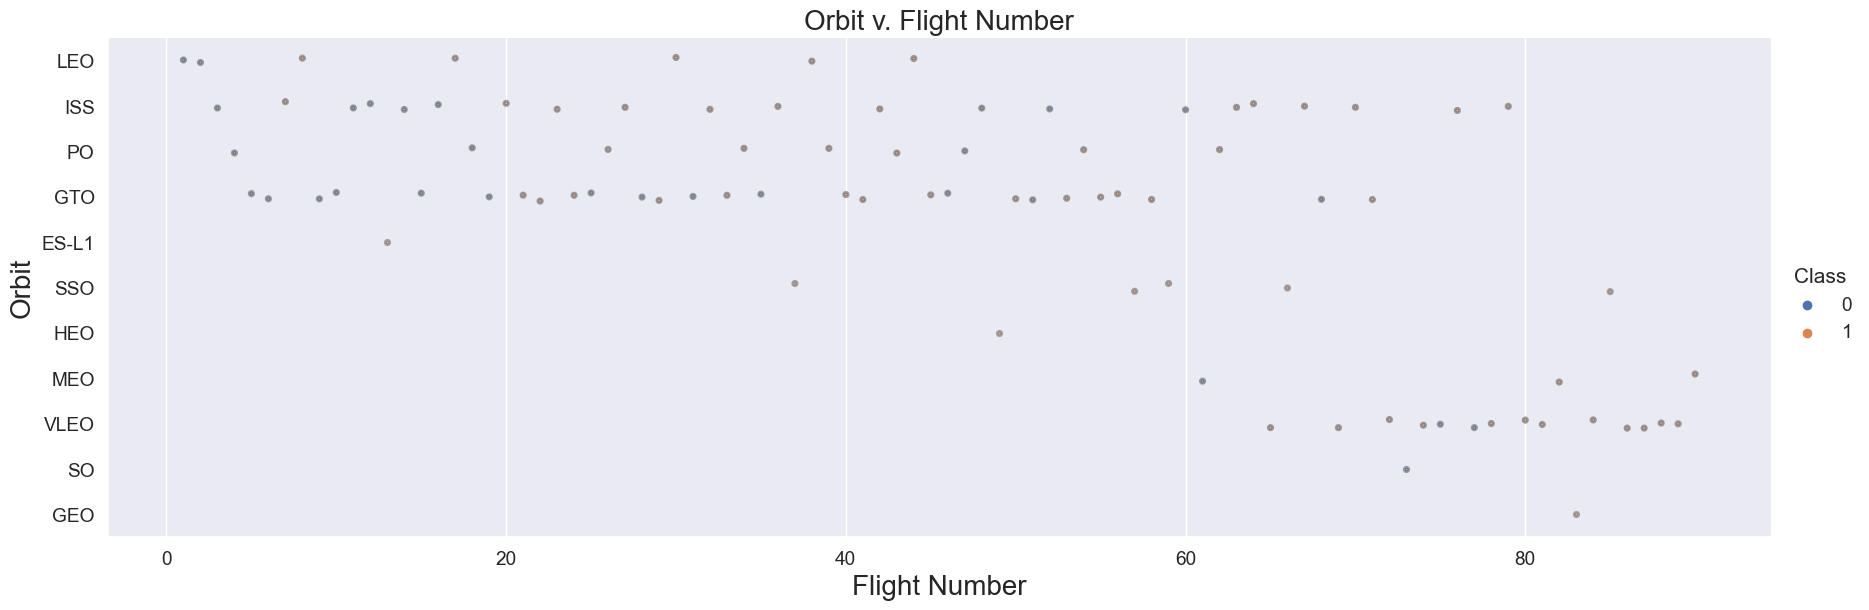

In [20]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.set(font_scale = 1.25)
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, s=10,
alpha=0.5, linewidth=2, height=6, aspect=3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.title("Orbit v. Flight Number",fontsize=20)
plt.show()



TASK 5: Visualize the relationship between Payload Mass and Orbit type
Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


C:\Users\15129\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\15129\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


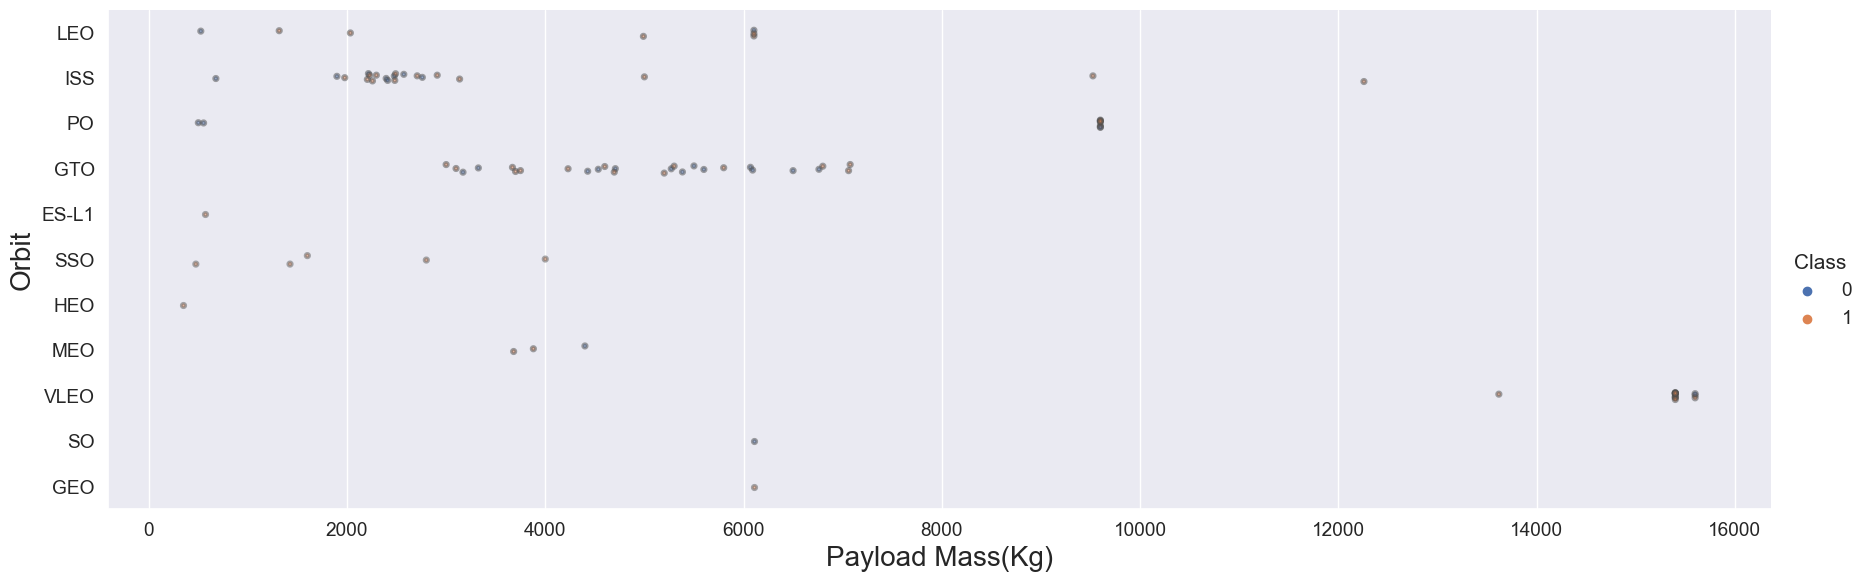

In [23]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.set(font_scale = 1.25)
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, s=10,
alpha=0.5, linewidth=2, height=6, aspect=3)
#sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Payload Mass(Kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.
However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.
TASK 6: Visualize the launch success yearly trend
You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.
The function will help you get the year from the date:


In [26]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year

<bound method NDFrame.head of     FlightNumber        Date BoosterVersion   PayloadMass Orbit    LaunchSite  \
0              1    6/4/2010       Falcon 9   6104.959412   LEO  CCAFS SLC 40   
1              2   5/22/2012       Falcon 9    525.000000   LEO  CCAFS SLC 40   
2              3    3/1/2013       Falcon 9    677.000000   ISS  CCAFS SLC 40   
3              4   9/29/2013       Falcon 9    500.000000    PO   VAFB SLC 4E   
4              5   12/3/2013       Falcon 9   3170.000000   GTO  CCAFS SLC 40   
..           ...         ...            ...           ...   ...           ...   
85            86    9/3/2020       Falcon 9  15400.000000  VLEO    KSC LC 39A   
86            87   10/6/2020       Falcon 9  15400.000000  VLEO    KSC LC 39A   
87            88  10/18/2020       Falcon 9  15400.000000  VLEO    KSC LC 39A   
88            89  10/24/2020       Falcon 9  15400.000000  VLEO  CCAFS SLC 40   
89            90   11/5/2020       Falcon 9   3681.000000   MEO  CCAFS SLC 40  

C:\Users\15129\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\15129\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


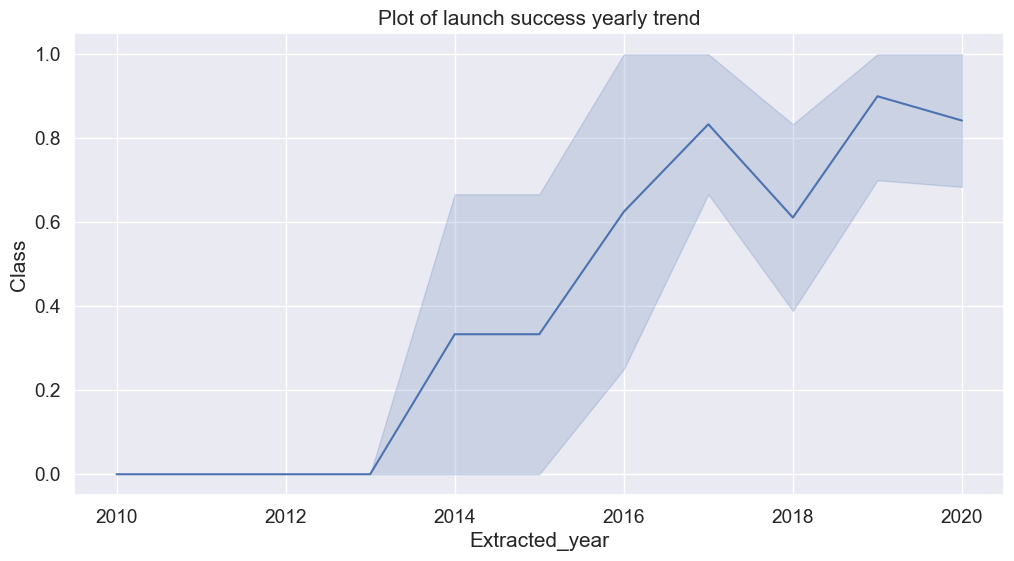

In [28]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df_copy = df.copy()
df_copy['Extracted_year'] = pd.DatetimeIndex(df['Date']).year

# plot line chart
fig, ax=plt.subplots(figsize=(12,6))
sns.lineplot(data=df_copy, x='Extracted_year', y='Class')
plt.title('Plot of launch success yearly trend');
plt.show()

In [30]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['Year'] = pd.DataFrame(Extract_year(df['Date'])).astype('int')
sns.lineplot(x = df['Year'].unique() , y = df.groupby(['Year'])['Class'].mean())
#plt.xlabel("Years",fontsize=20)
#plt.ylabel("Success Rate",fontsize=20)
plt.xlabel("Year",fontsize=12, fontweight='bold')
plt.ylabel("Success Rate",fontsize=12, fontweight='bold')
#plt.plot(X,total_launches)
plt.title("Success rate. SpaceX Falcon-9", fontsize=15, fontweight='bold')
plt.show()


TypeError: Extract_year() takes 0 positional arguments but 1 was given

you can observe that the sucess rate since 2013 kept increasing till 2020
Features Engineering
By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [41]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1,0,B1004


TASK 7: Create dummy variables to categorical columns
Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [44]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial','GridFins','Reused','Legs'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1,6104.959412,1,1,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,2,525.000000,1,1,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,3,677.000000,1,1,0,False,False,False,False,True,...,False,False,False,False,True,False,True,False,True,False
3,4,500.000000,1,1,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
4,5,3170.000000,1,1,0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False


Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64

In [47]:
# HINT: use astype function
features_one_hot.astype('float64').dtypes

FlightNumber     float64
PayloadMass      float64
Flights          float64
Block            float64
ReusedCount      float64
                  ...   
GridFins_True    float64
Reused_False     float64
Reused_True      float64
Legs_False       float64
Legs_True        float64
Length: 83, dtype: object

We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

In [50]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)